## EDA Report on Webinar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Webinar Leads.csv')
df.isnull().sum()

attended                   0
Leads ID               13158
phone                   4365
registration_time          0
approval_status            0
join_time              38211
leave_time             38211
time_in_session            0
is_guest                   0
country_region_name    38211
source_name            29432
original_source         4837
contacted               9096
webinar_date               0
dtype: int64

## Data Cleaning and Univariate Analysis

In [3]:
df.shape

(42784, 14)

In [4]:
df['join_time'].isnull().sum() / len(df) * 100
df['source_name'].isnull().sum() / len(df) * 100

68.792071802543

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42784 entries, 0 to 42783
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   attended             42784 non-null  object
 1   Leads ID             29626 non-null  object
 2   phone                38419 non-null  object
 3   registration_time    42784 non-null  object
 4   approval_status      42784 non-null  object
 5   join_time            4573 non-null   object
 6   leave_time           4573 non-null   object
 7   time_in_session      42784 non-null  int64 
 8   is_guest             42784 non-null  object
 9   country_region_name  4573 non-null   object
 10  source_name          13352 non-null  object
 11  original_source      37947 non-null  object
 12  contacted            33688 non-null  object
 13  webinar_date         42784 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.6+ MB


In [6]:
df['registration_time'] = pd.to_datetime(df['registration_time'])
df['join_time'] = pd.to_datetime(df['join_time'])
df['leave_time'] = pd.to_datetime(df['leave_time'])
df['webinar_date'] = pd.to_datetime(df['webinar_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42784 entries, 0 to 42783
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   attended             42784 non-null  object        
 1   Leads ID             29626 non-null  object        
 2   phone                38419 non-null  object        
 3   registration_time    42784 non-null  datetime64[ns]
 4   approval_status      42784 non-null  object        
 5   join_time            4573 non-null   datetime64[ns]
 6   leave_time           4573 non-null   datetime64[ns]
 7   time_in_session      42784 non-null  int64         
 8   is_guest             42784 non-null  object        
 9   country_region_name  4573 non-null   object        
 10  source_name          13352 non-null  object        
 11  original_source      37947 non-null  object        
 12  contacted            33688 non-null  object        
 13  webinar_date         42784 non-

In [7]:
df['original_source'].fillna(method='bfill', inplace=True)
df['original_source'].fillna(df['original_source'].mode()[0], inplace=True, )
df['original_source'].isnull().sum()
df['original_source'].unique()
df['original_source'].value_counts()

original_source
Facebook               21266
Zoom Webinar           12197
LinkedIn                4884
N-DB                    1847
B.Tech 19-20 Grad        760
                       ...  
Google                     1
17th sept hot leads        1
8066170261                 1
Live Chat                  1
7969257059                 1
Name: count, Length: 62, dtype: int64

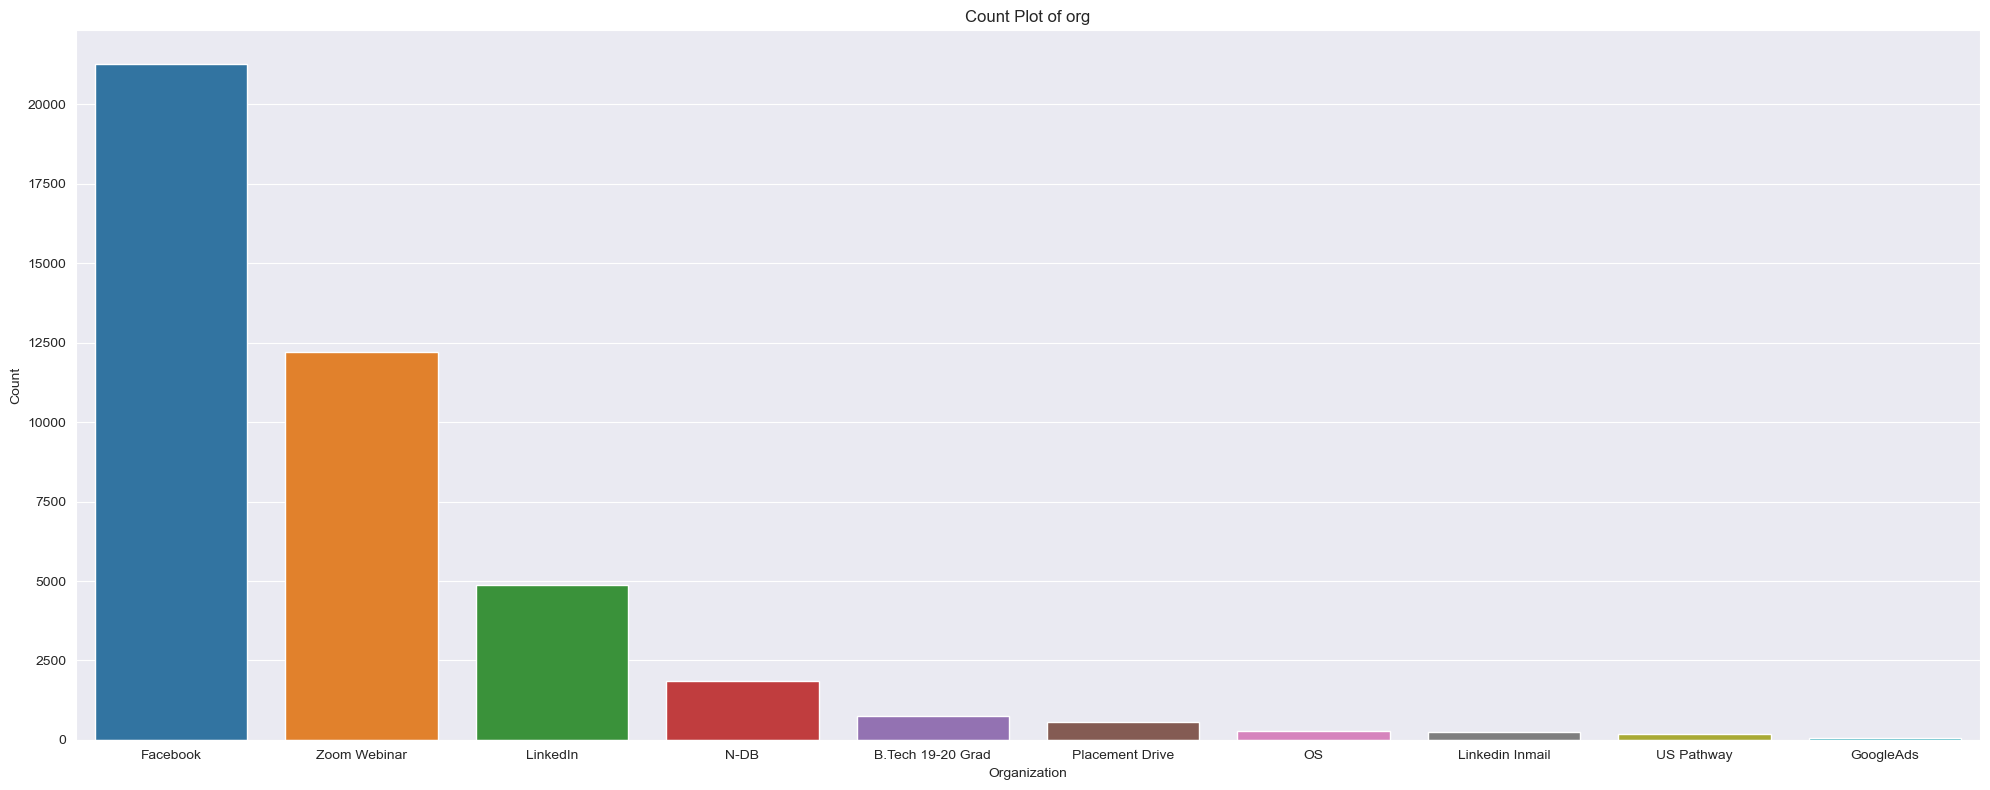

In [8]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='original_source', data=df,order=df['original_source'].value_counts().nlargest(10).index)
ax.set_title('Count Plot of org')
ax.set_xlabel('Organization')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

We can see that most of the leads are coming from facebook and zoom Webinars

In [9]:
df_yes = df[df['attended'] == 'Yes']
df_no = df[df['attended'] == 'No']
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38210 entries, 0 to 42783
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   attended             38210 non-null  object        
 1   Leads ID             28160 non-null  object        
 2   phone                33845 non-null  object        
 3   registration_time    38210 non-null  datetime64[ns]
 4   approval_status      38210 non-null  object        
 5   join_time            0 non-null      datetime64[ns]
 6   leave_time           0 non-null      datetime64[ns]
 7   time_in_session      38210 non-null  int64         
 8   is_guest             38210 non-null  object        
 9   country_region_name  0 non-null      object        
 10  source_name          9112 non-null   object        
 11  original_source      38210 non-null  object        
 12  contacted            29273 non-null  object        
 13  webinar_date         38210 non-null 

In [10]:
df_yes.loc[:, 'join_time'] = pd.to_datetime(df_yes['join_time'])
df_yes.loc[:, 'leave_time'] = pd.to_datetime(df_yes['leave_time'])
df_yes.dtypes

attended                       object
Leads ID                       object
phone                          object
registration_time      datetime64[ns]
approval_status                object
join_time              datetime64[ns]
leave_time             datetime64[ns]
time_in_session                 int64
is_guest                       object
country_region_name            object
source_name                    object
original_source                object
contacted                      object
webinar_date           datetime64[ns]
dtype: object

In [11]:
print(df_yes.dtypes)

attended                       object
Leads ID                       object
phone                          object
registration_time      datetime64[ns]
approval_status                object
join_time              datetime64[ns]
leave_time             datetime64[ns]
time_in_session                 int64
is_guest                       object
country_region_name            object
source_name                    object
original_source                object
contacted                      object
webinar_date           datetime64[ns]
dtype: object


In [12]:
df_yes.to_csv('df_yes.csv')
df_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4574 entries, 72 to 42777
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   attended             4574 non-null   object        
 1   Leads ID             1466 non-null   object        
 2   phone                4574 non-null   object        
 3   registration_time    4574 non-null   datetime64[ns]
 4   approval_status      4574 non-null   object        
 5   join_time            4573 non-null   datetime64[ns]
 6   leave_time           4573 non-null   datetime64[ns]
 7   time_in_session      4574 non-null   int64         
 8   is_guest             4574 non-null   object        
 9   country_region_name  4573 non-null   object        
 10  source_name          4240 non-null   object        
 11  original_source      4574 non-null   object        
 12  contacted            4415 non-null   object        
 13  webinar_date         4574 non-null  

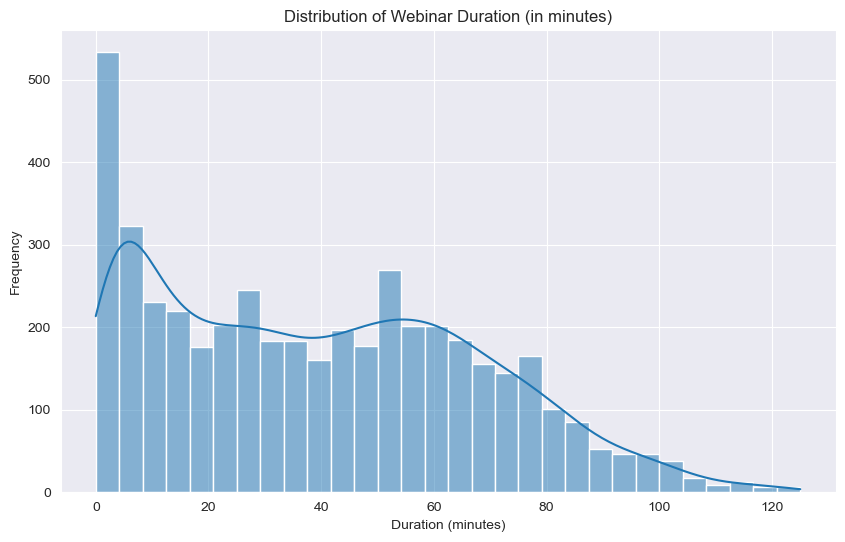

In [13]:
# Distribution of Webinar Duration in minutes
plt.figure(figsize=(10, 6))
sns.histplot(df_yes['time_in_session'], bins=30, kde=True)
plt.title('Distribution of Webinar Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

We can clearly see that People are started leave the webinars after 50 to 60

In [14]:
numerical=df.select_dtypes(include=['float','int']).columns
print(numerical)

Index(['time_in_session'], dtype='object')


In [15]:
df_no_id = df_yes[df_yes['Leads ID'].isna() | (df_yes['Leads ID'] == '')]
df_no_id.isnull().sum()

attended                  0
Leads ID               3108
phone                     0
registration_time         0
approval_status           0
join_time                 0
leave_time                0
time_in_session           0
is_guest                  0
country_region_name       0
source_name             178
original_source           0
contacted               155
webinar_date              0
dtype: int64

In [16]:
# Creating a graph that foucs on people how came from campaing and other sources 
df['Lead cat']=df['Leads ID'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes')

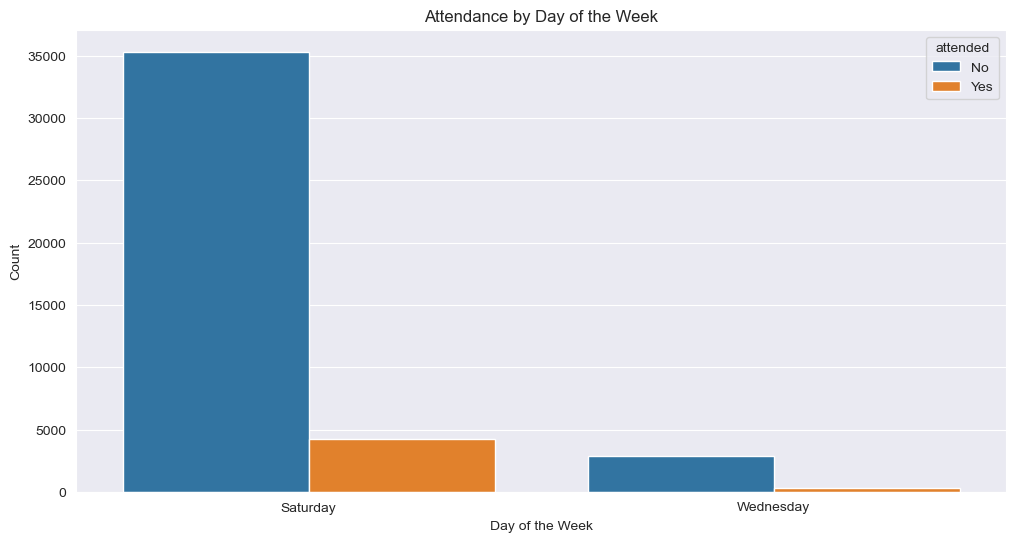

In [17]:
# Which day of the week or which day of month and which month has more attended
df['day_of_week'] = df['webinar_date'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', hue='attended')
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

In [18]:
df['day_of_week'].unique()
df['day_of_week'].value_counts()

day_of_week
Saturday     39571
Wednesday     3213
Name: count, dtype: int64

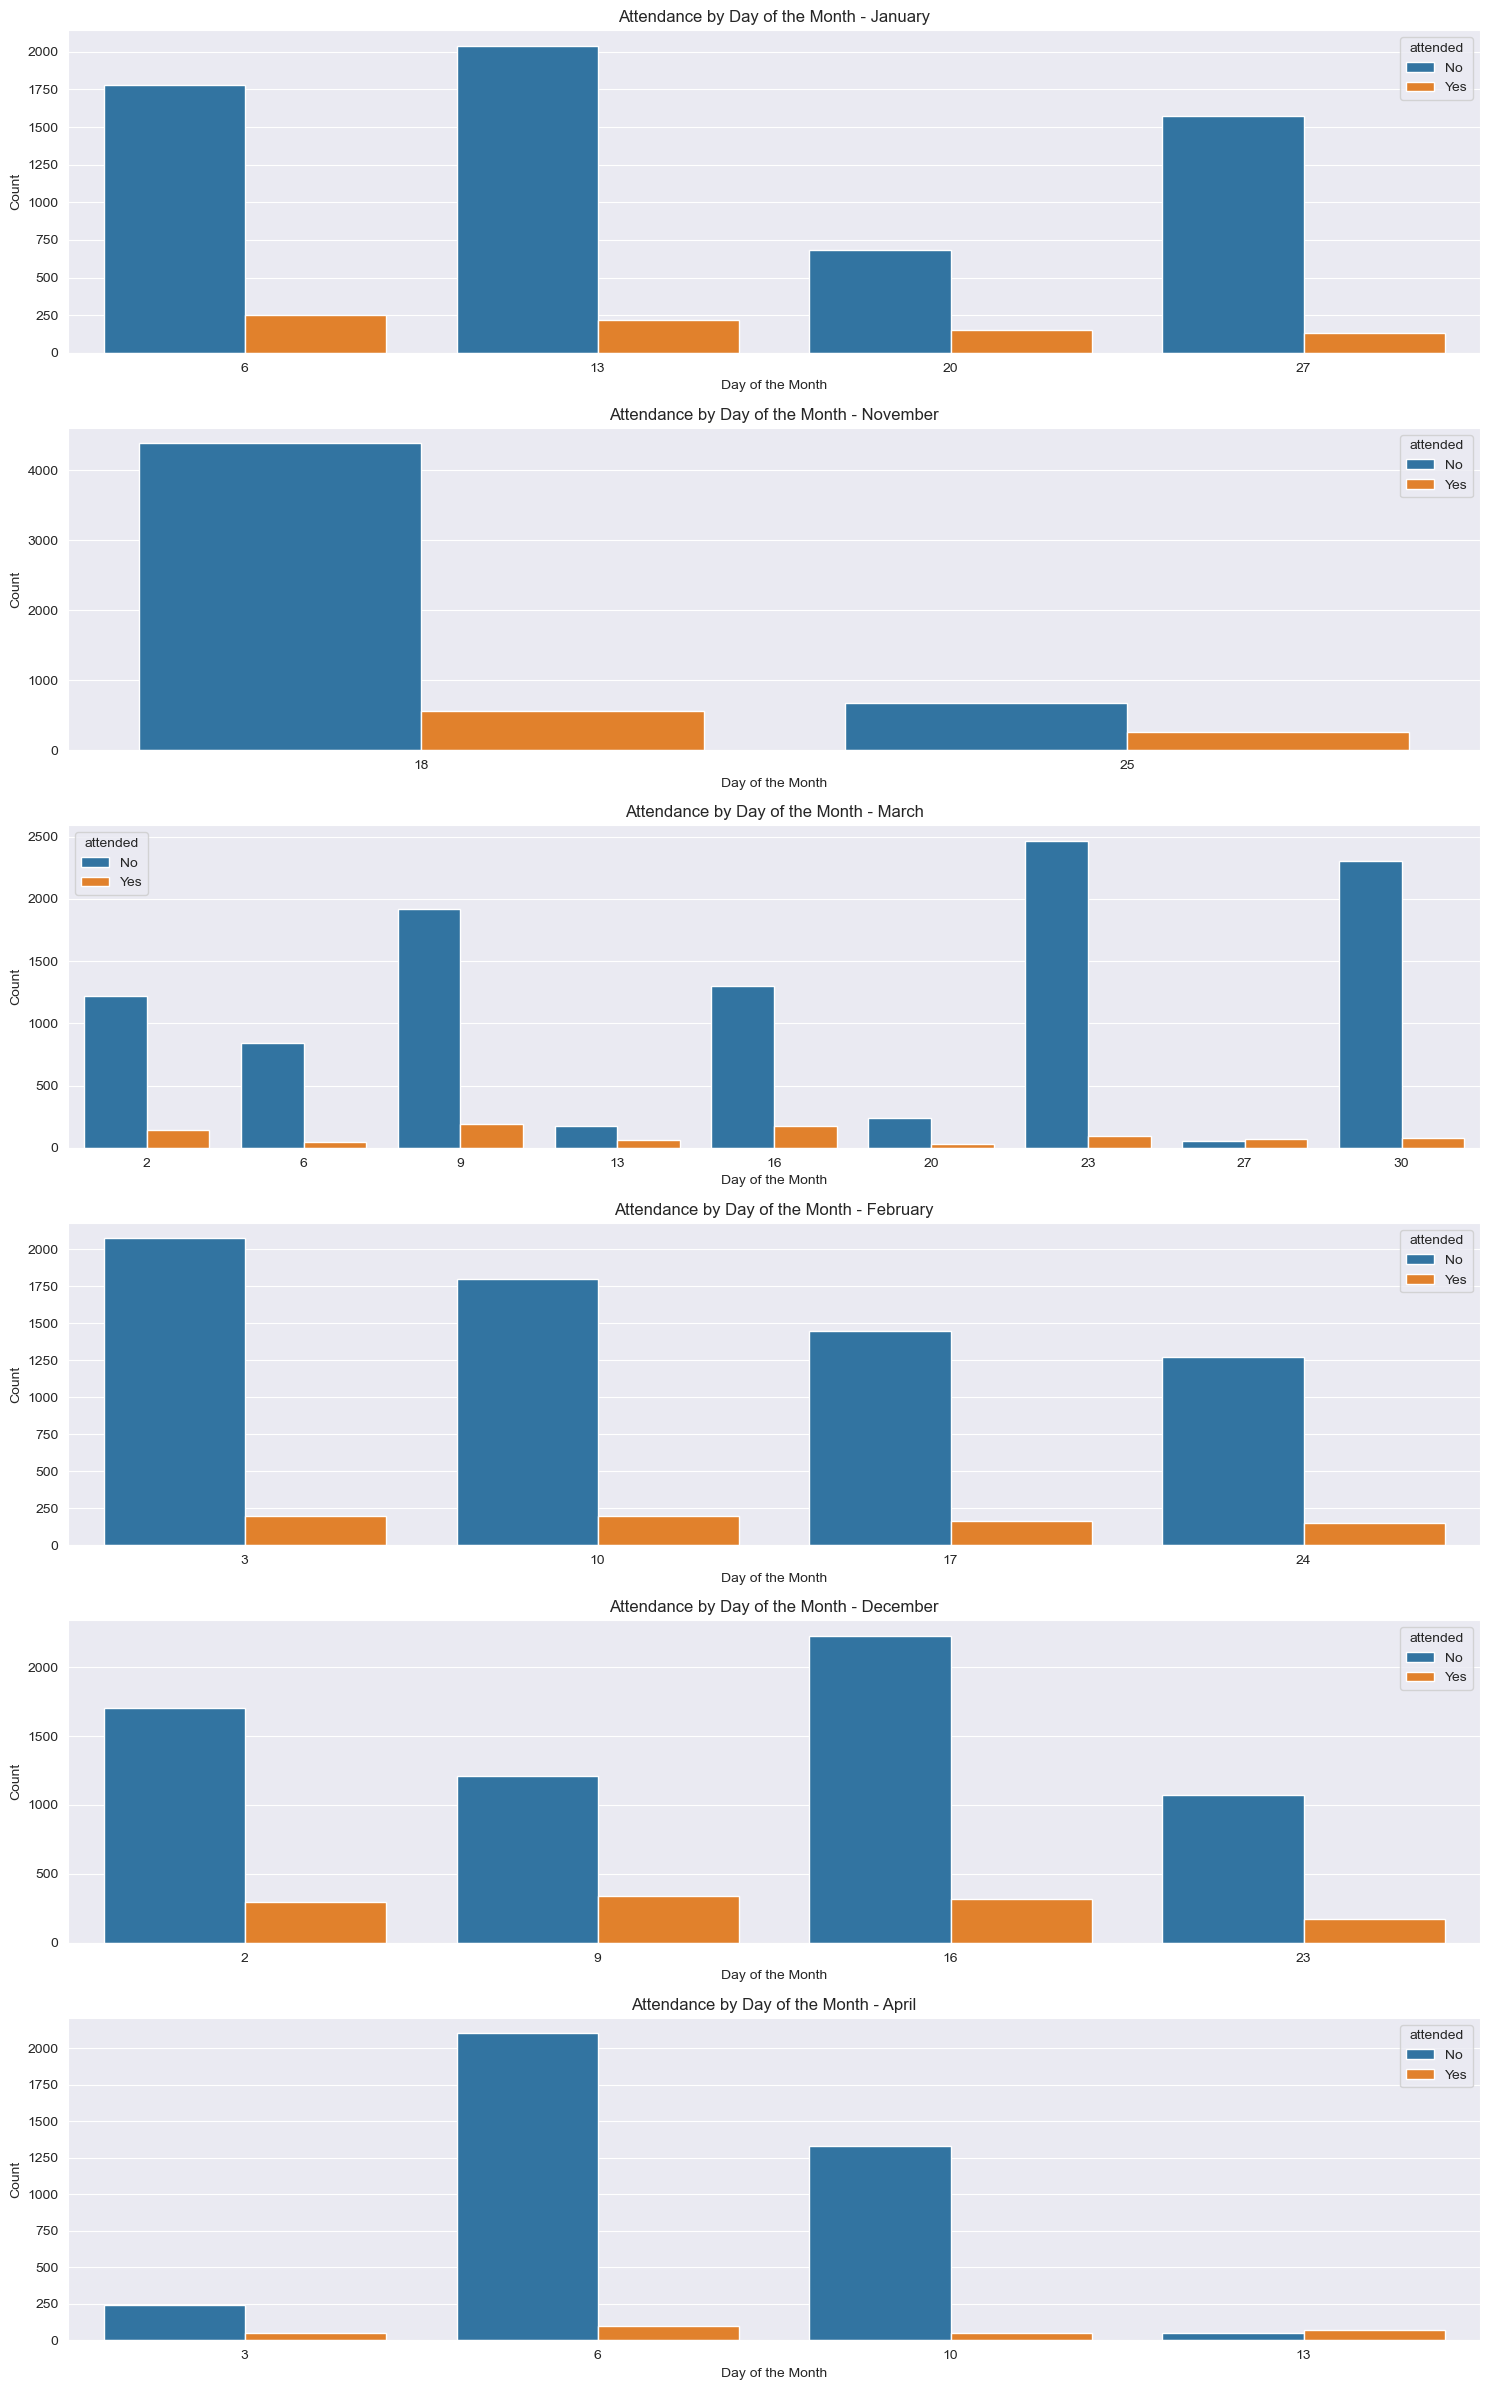

In [19]:
df['day_of_month'] = df['webinar_date'].dt.day
df['month'] = df['webinar_date'].dt.month_name()

months = df['month'].unique()
num_months = len(months)

plt.figure(figsize=(15, num_months * 4))

for i, month in enumerate(months, 1):
    plt.subplot(num_months, 1, i)
    sns.countplot(data=df[df['month'] == month], x='day_of_month', hue='attended')
    plt.title(f'Attendance by Day of the Month - {month}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

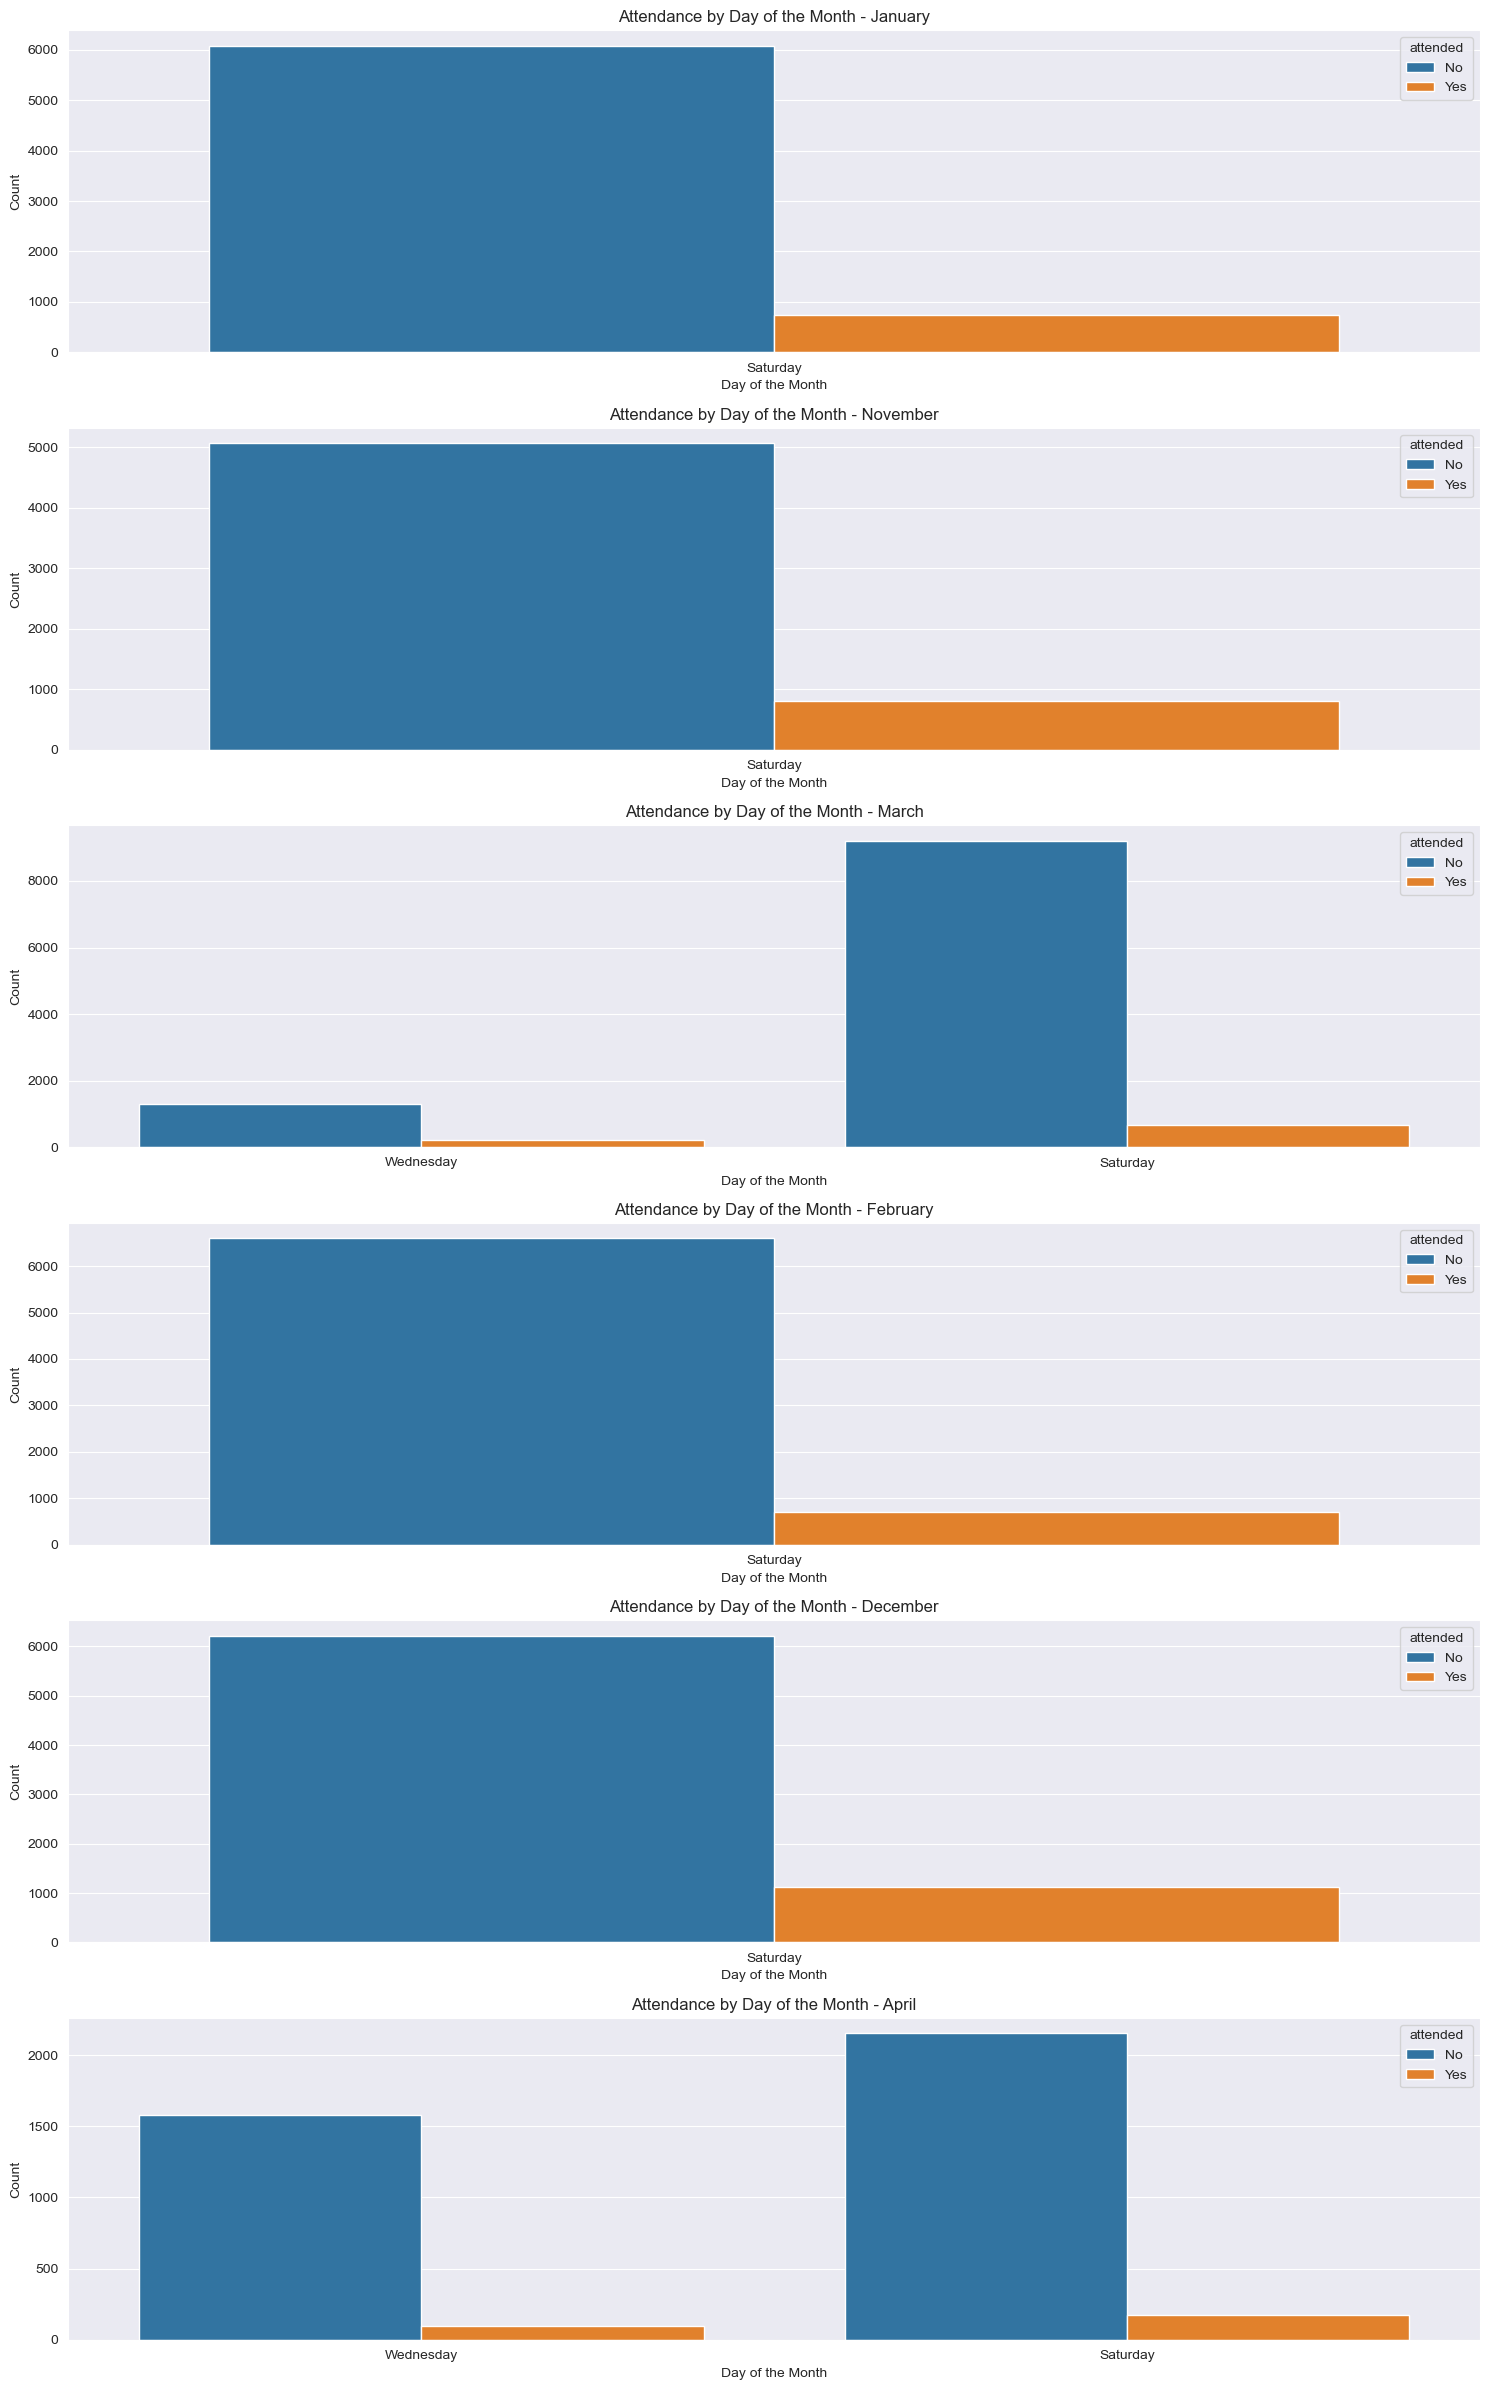

In [20]:
df['day_of_month'] = df['webinar_date'].dt.day
df['month'] = df['webinar_date'].dt.month_name()

months = df['month'].unique()
num_months = len(months)

plt.figure(figsize=(15, num_months * 4))

for i, month in enumerate(months, 1):
    plt.subplot(num_months, 1, i)
    sns.countplot(data=df[df['month'] == month], x='day_of_week', hue='attended')
    plt.title(f'Attendance by Day of the Month - {month}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

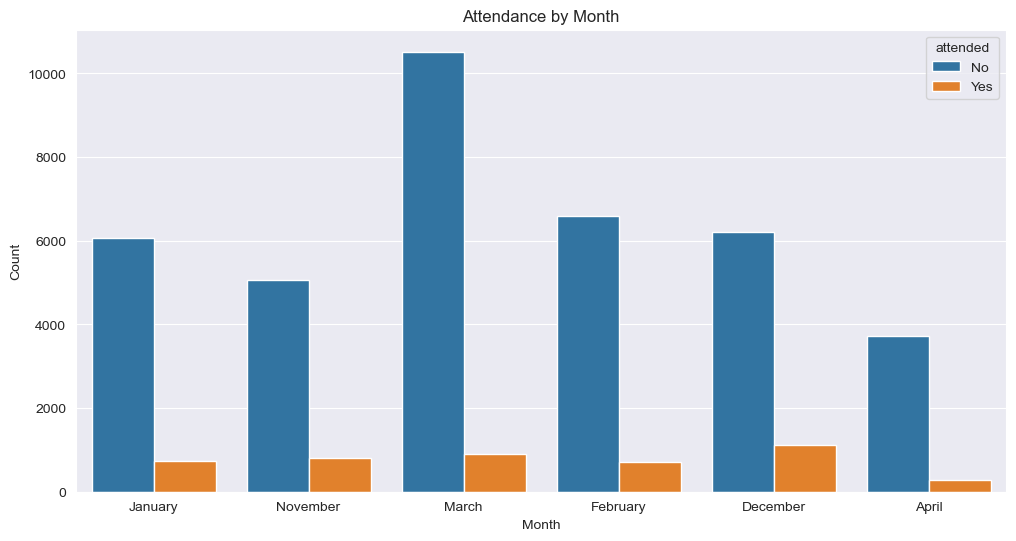

In [21]:
#During which hour more floating is there
df['month'] = df['webinar_date'].dt.month_name()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='attended')
plt.title('Attendance by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

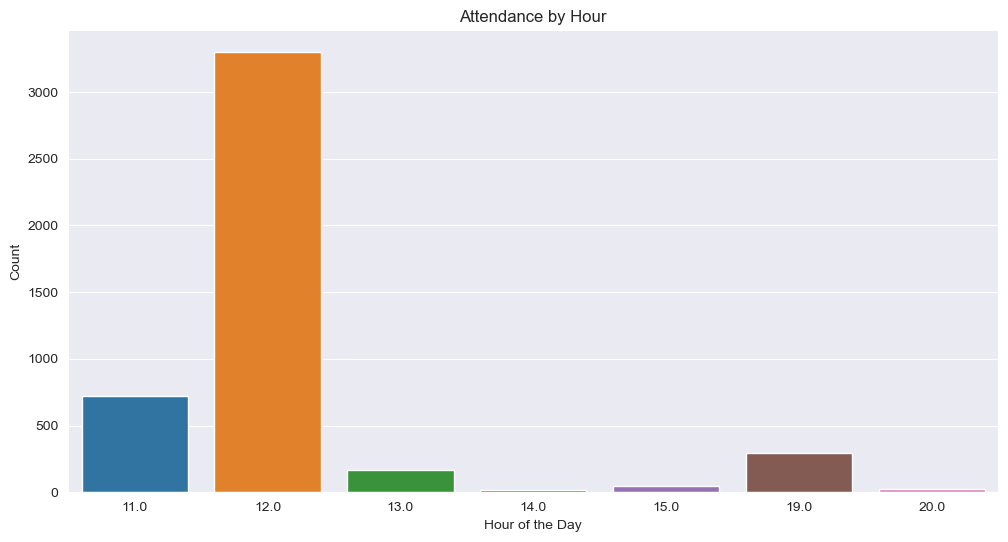

In [22]:
df['hour'] = df['join_time'].dt.hour

# Plot attendance by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour')
plt.title('Attendance by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

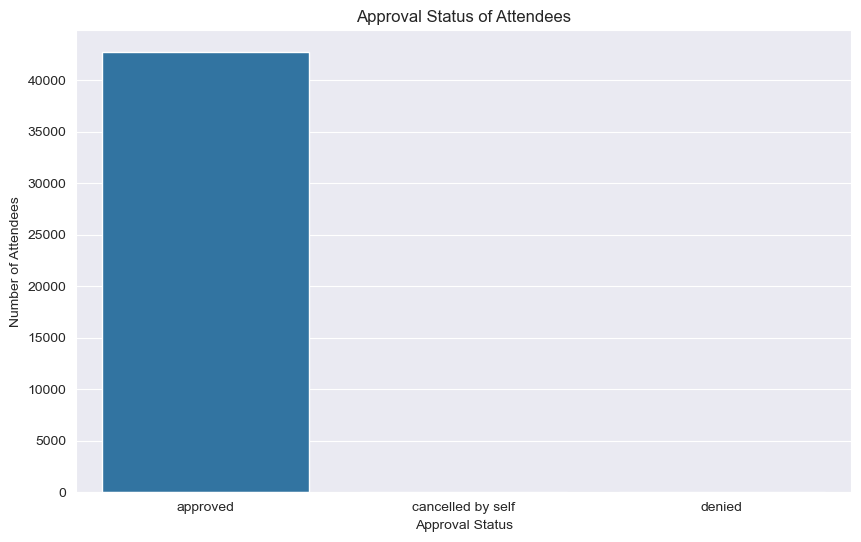

In [23]:
approval_status_counts = df['approval_status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=approval_status_counts.index, y=approval_status_counts.values)
plt.title('Approval Status of Attendees')
plt.xlabel('Approval Status')
plt.ylabel('Number of Attendees')
plt.show()

In [24]:
df['is_weekend'] = df['webinar_date'].dt.dayofweek >= 5

# Calculate the probability
weekend_attendance = df[df['is_weekend'] == True]['attended'].value_counts(normalize=True)
weekday_attendance = df[df['is_weekend'] == False]['attended'].value_counts(normalize=True)

print(f"Weekend attendance probability:\n{weekend_attendance}")
print(f"Weekday attendance probability:\n{weekday_attendance}")

Weekend attendance probability:
attended
No     0.892573
Yes    0.107427
Name: proportion, dtype: float64
Weekday attendance probability:
attended
No     0.899471
Yes    0.100529
Name: proportion, dtype: float64


In [25]:
df_lead = df_yes[pd.notnull(df_yes['Leads ID'])]

In [26]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 7291 to 42592
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   attended             1466 non-null   object        
 1   Leads ID             1466 non-null   object        
 2   phone                1466 non-null   object        
 3   registration_time    1466 non-null   datetime64[ns]
 4   approval_status      1466 non-null   object        
 5   join_time            1465 non-null   datetime64[ns]
 6   leave_time           1465 non-null   datetime64[ns]
 7   time_in_session      1466 non-null   int64         
 8   is_guest             1466 non-null   object        
 9   country_region_name  1465 non-null   object        
 10  source_name          1310 non-null   object        
 11  original_source      1466 non-null   object        
 12  contacted            1462 non-null   object        
 13  webinar_date         1466 non-null

C:\Users\upend\AppData\Local\Temp\ipykernel_20264\4055309143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lead['month'] = df_lead['webinar_date'].dt.month_name()


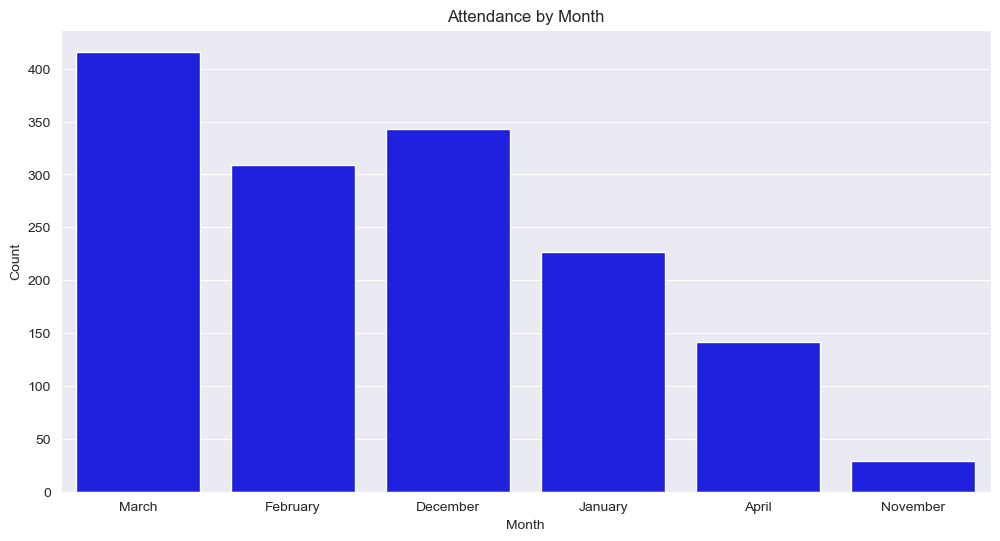

In [27]:
df_lead['month'] = df_lead['webinar_date'].dt.month_name()
plt.figure(figsize=(12, 6))
sns.countplot(data=df_lead, x='month',color='blue')
plt.title('Attendance by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

C:\Users\upend\AppData\Local\Temp\ipykernel_20264\675831195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lead['hour'] = df_lead['join_time'].dt.hour


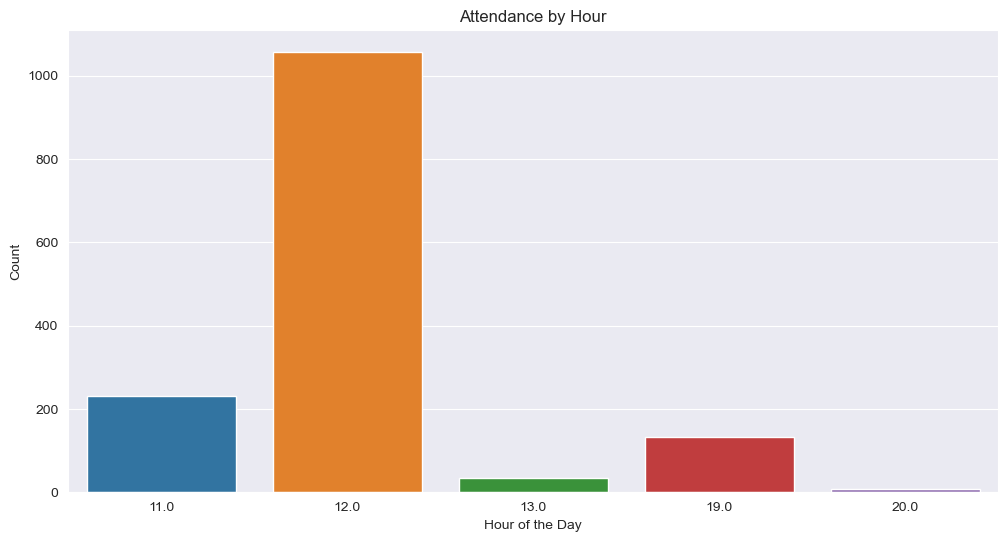

In [28]:
df_lead['hour'] = df_lead['join_time'].dt.hour

# Plot attendance by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df_lead, x='hour')
plt.title('Attendance by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

## Bivarate Analysis

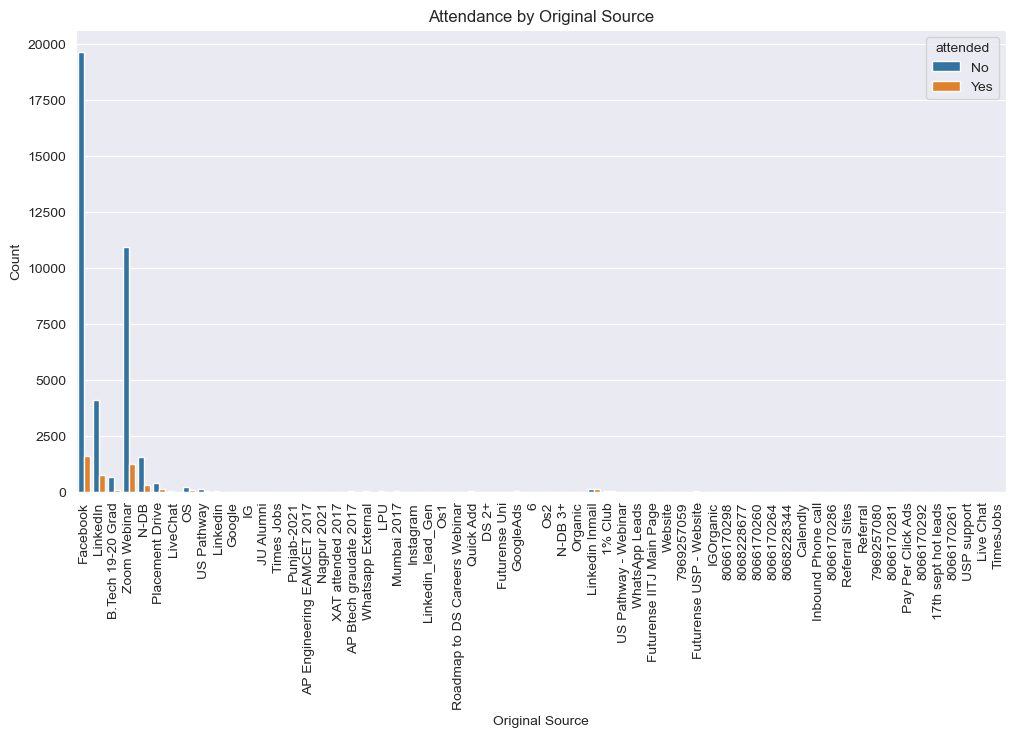

In [29]:
# Count plot of 'attended' vs 'original_source'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='original_source', hue='attended')
plt.title('Attendance by Original Source')
plt.xlabel('Original Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [30]:
crosstab = pd.crosstab(df['original_source'], df['attended'])
print(crosstab)

attended                No   Yes
original_source                 
1% Club                 24    26
17th sept hot leads      0     1
6                        1     0
7969257059               1     0
7969257080               3     0
...                    ...   ...
Website                  2     0
WhatsApp Leads           6     8
Whatsapp External       25     7
XAT attended 2017       12     0
Zoom Webinar         10947  1250

[62 rows x 2 columns]


In [31]:
df['session_duration'] = (df['leave_time'] - df['join_time']).dt.total_seconds() / 60

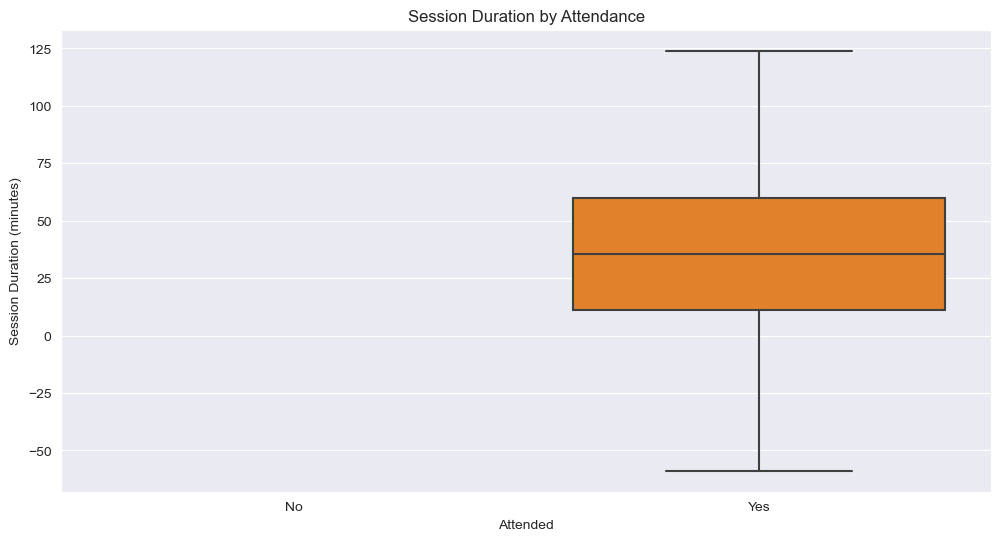

In [32]:
# Box plot of 'session_duration' vs 'attended'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='attended', y='session_duration')
plt.title('Session Duration by Attendance')
plt.xlabel('Attended')
plt.ylabel('Session Duration (minutes)')
plt.show()

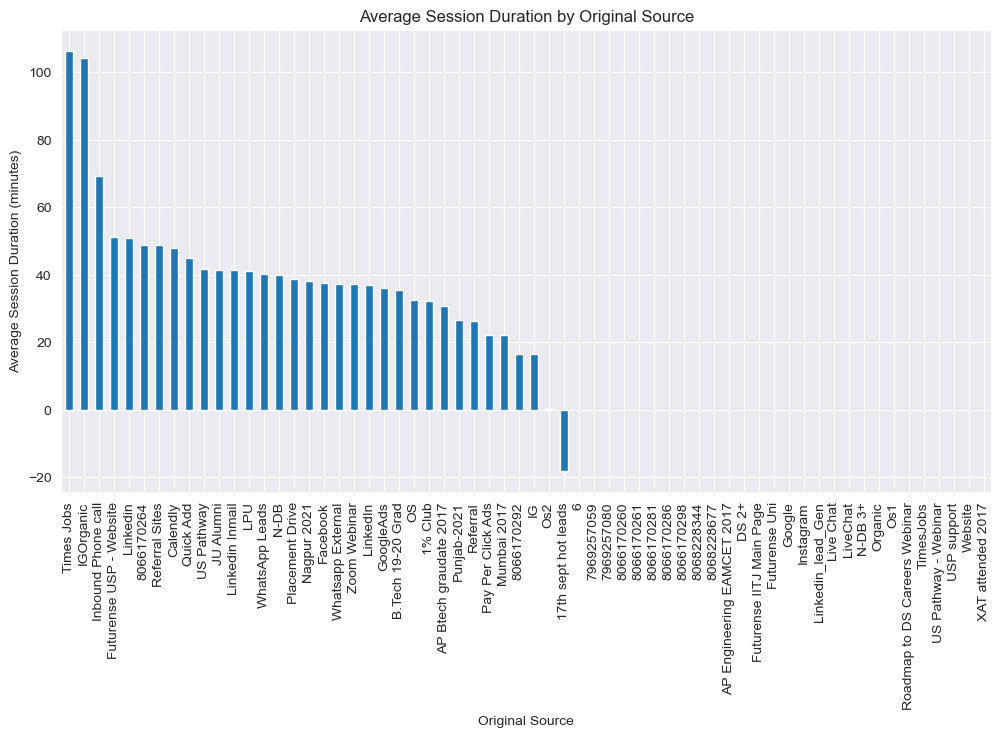

In [33]:
# Bar plot of average 'session_duration' by 'original_source'
avg_duration = df.groupby('original_source')['session_duration'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_duration.plot(kind='bar')
plt.title('Average Session Duration by Original Source')
plt.xlabel('Original Source')
plt.ylabel('Average Session Duration (minutes)')
plt.xticks(rotation=90)
plt.show()

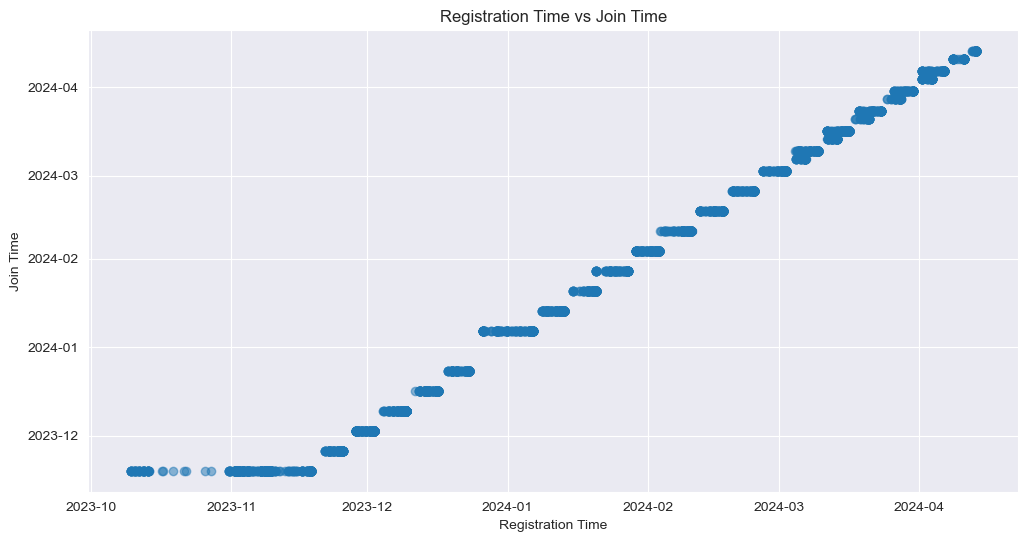

In [34]:
# Scatter plot of 'registration_time' vs 'join_time'
plt.figure(figsize=(12, 6))
plt.scatter(df['registration_time'], df['join_time'], alpha=0.5)
plt.title('Registration Time vs Join Time')
plt.xlabel('Registration Time')
plt.ylabel('Join Time')
plt.show()

In [35]:
df['webinar_date'].unique()

<DatetimeArray>
['2024-01-13 00:00:00', '2023-11-18 00:00:00', '2024-03-20 00:00:00',
 '2023-11-25 00:00:00', '2024-03-23 00:00:00', '2024-03-30 00:00:00',
 '2024-02-03 00:00:00', '2023-12-02 00:00:00', '2024-01-20 00:00:00',
 '2024-04-03 00:00:00', '2024-04-06 00:00:00', '2024-01-27 00:00:00',
 '2024-01-06 00:00:00', '2024-02-10 00:00:00', '2023-12-09 00:00:00',
 '2023-12-23 00:00:00', '2024-03-16 00:00:00', '2024-03-06 00:00:00',
 '2024-03-27 00:00:00', '2024-02-17 00:00:00', '2024-03-02 00:00:00',
 '2024-03-09 00:00:00', '2024-04-10 00:00:00', '2024-04-13 00:00:00',
 '2023-12-16 00:00:00', '2024-03-13 00:00:00', '2024-02-24 00:00:00']
Length: 27, dtype: datetime64[ns]

In [36]:
df.shape

(42784, 21)

### Conclusion and Recommendations

**Conclusion:**

1. **Attendance Sources**:
- Most leads come from Facebook and Zoom Webinars, showing these platforms are the most effective for attracting attendees.

2. **Attendance Patterns**:
- Attendance varies by day of the week, with some days having higher numbers.
- Both the month and specific days within the month affect attendance rates.
- Weekends and weekdays show different attendance probabilities, indicating attendee behavior changes based on the day.

3. **Session Duration**:
- Many attendees leave the webinar after 50 to 60 minutes.
- The average session duration differs based on the original source, suggesting the source influences how long attendees stay.

4. **Time-Based Insights**:
- Attendance varies by hour of the day, which is useful for scheduling future webinars.
- Approval status insights help understand attendee demographics.

**Recommendations:**

1. **Optimize Marketing Channels**:
- Focus on effective channels like Facebook and Zoom for marketing future webinars. Allocate more budget and resources to these platforms.

2. **Schedule Optimization**:
- Schedule webinars on days with historically higher attendance. Consider the preferred days and times for your audience.
- Keep webinars concise, ideally within 50-60 minutes, as many attendees tend to leave after this duration.

3. **Targeted Content**:
- Tailor webinar content based on the source of the lead. For example, leads from Facebook might have different interests compared to those from Zoom Webinars.

4. **Engagement Strategies**:
- Use interactive elements like Q&A sessions, polls, and breakout rooms to keep attendees engaged throughout the webinar.

5. **Follow-Up and Lead Nurturing**:
- Develop personalized follow-up strategies for webinar attendees to convert them into customers. Ensure data collection during registration is robust to capture all necessary details.

6. **Data-Driven Decision Making**:
- Continuously analyze attendance data to refine strategies. Use insights to inform future webinar topics, formats, and schedules.
- Conduct A/B testing with different webinar formats and timings to find the most effective approach.

By using these insights and recommendations, you can make your webinars more effective, improve attendance rates, and increase engagement with your target audience. If you need further analysis or more specific recommendations, feel free to ask!